In [32]:
import os
import sys
import pickle
import warnings
import time
import logging
import glob
import string

import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from matplotlib import ticker
from matplotlib.legend import Legend
from IPython.display import clear_output
from matplotlib.lines import Line2D

dir_path = 'C:\\Users\\Simon Andersen\\Projects\\Projects\\Thesis\\NematicAnalysis' #os.path.dirname(os.path.realpath(''))
os.chdir(dir_path)

#sys.path.append('../')

from utils import *
from AnalyseDefects_dev import AnalyseDefects
from AnalyseDefectsAll import AnalyseDefectsAll

plt.style.use('sg_article')


In [8]:
def gen_analysis_dict(LL, mode):

    dshort = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05', \
              suffix = "short", priority = -1, LX = LL, Nframes = 181)
    dlong = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_long', \
                suffix = "long", priority = 1, LX = LL, Nframes = 400)
    priority_vl = 2 if LL == 512 else 3
    dvery_long = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_very_long',\
                    suffix = "very_long", priority = priority_vl, LX = LL, Nframes = 1500)
    dvery_long2 = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_very_long_v2',\
                    suffix = "very_long2", priority = 3 if priority_vl == 2 else 2, LX = LL, Nframes = 1500)

    if mode == 'all':
        if LL == 2048:
            defect_list = [dshort, dlong]
        else:
            defect_list = [dshort, dlong, dvery_long, dvery_long2] if LL in [256] else [dshort, dlong, dvery_long]
    else:
        defect_list = [dshort]
    
    return defect_list


In [33]:
os.getcwd()

'C:\\Users\\Simon Andersen\\Projects\\Projects\\Thesis\\NematicAnalysis'

In [34]:
system_size_list = [256, 512,1024, 2048]
#system_size_list = [2048]
ada = AnalyseDefectsAll(system_size_list)

LL = 2048
output_path = f'data\\nematic_analysis{LL}_LL0.05'
mode = 'all' # 'all' or 'short'

defect_list = gen_analysis_dict(LL, mode)

ad = AnalyseDefects(defect_list, output_path=output_path)

extract = False
analyze = False
merge = False

In [11]:
len_scale_arr_path = os.path.join(ad.output_main_path, 'len_scale_arr.npy')
len_scales_arr = np.load(len_scale_arr_path)

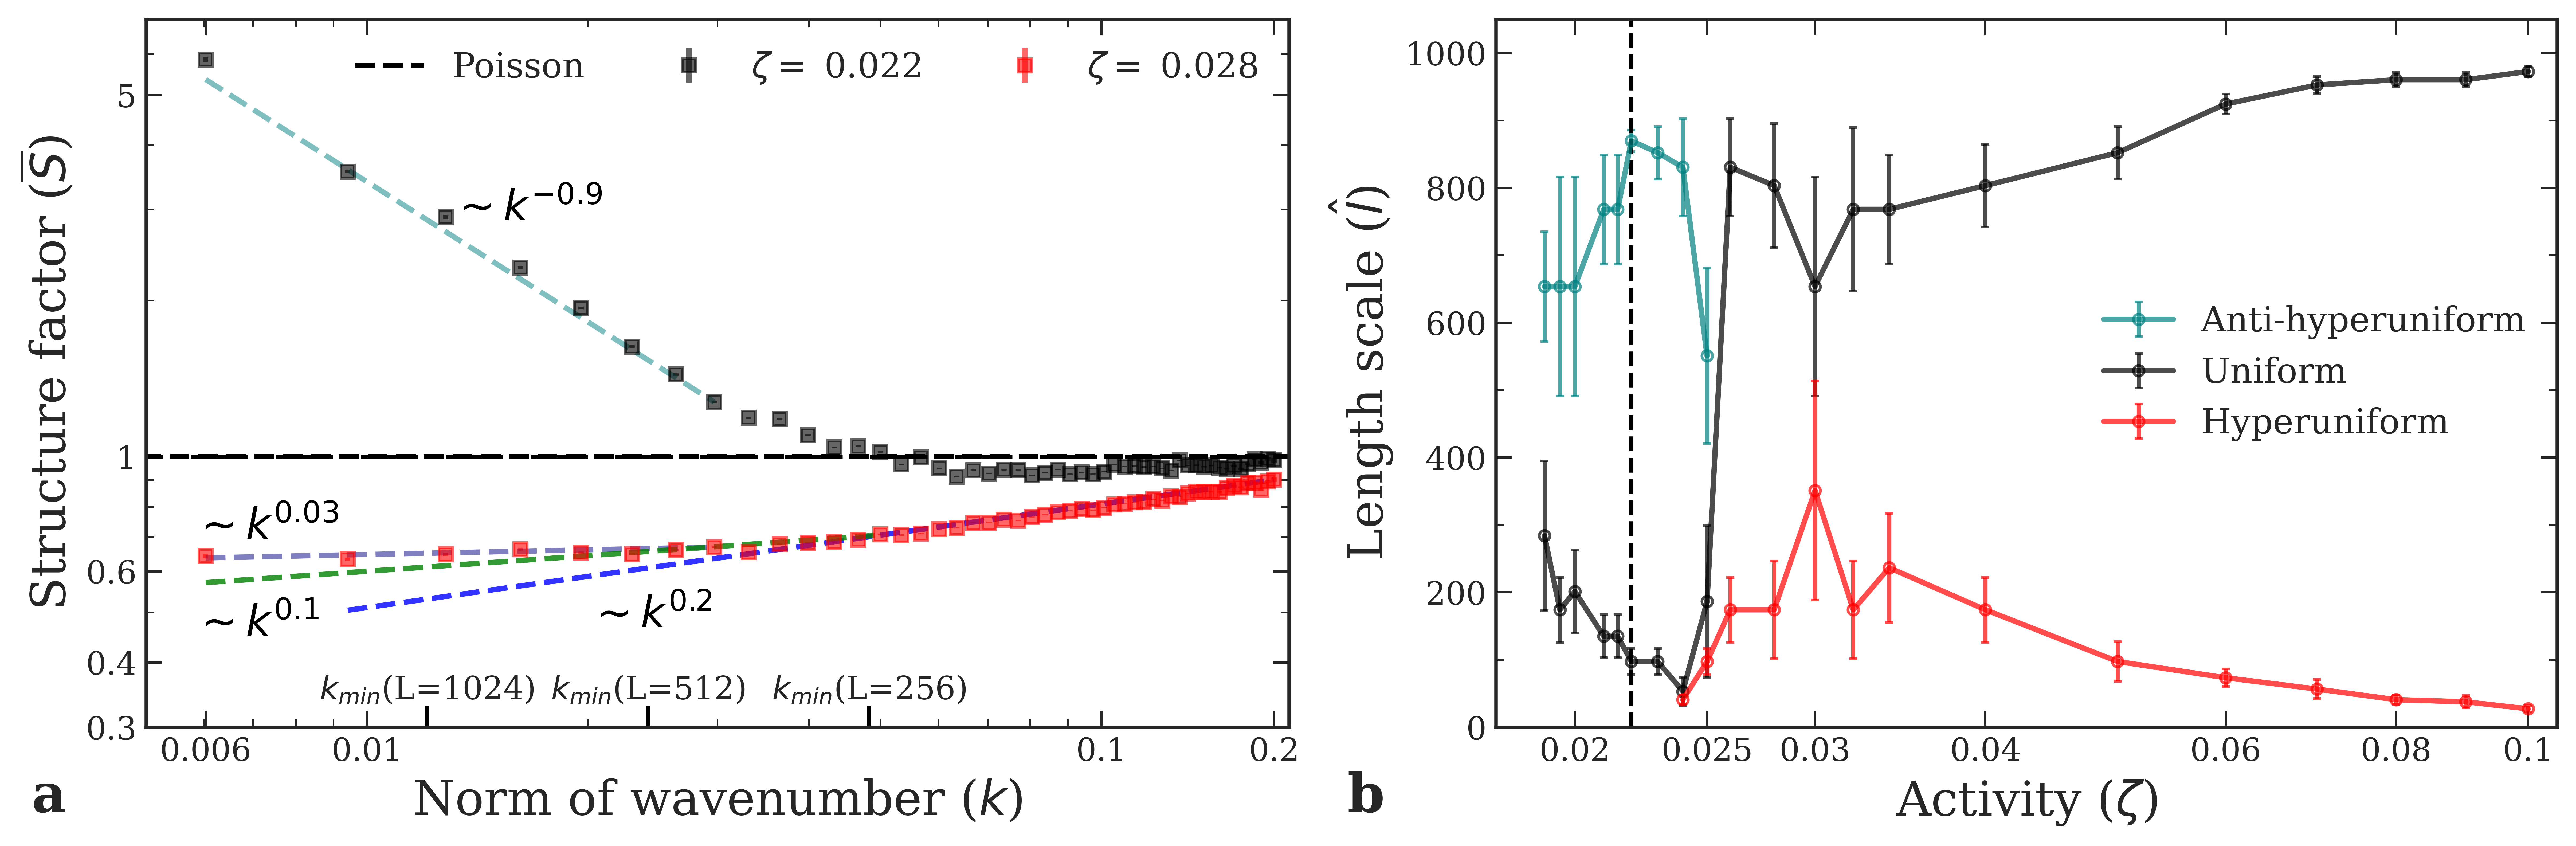

In [45]:
kbins, sfac_av = ada.get_sfac(LX=LL,time_av=True)[:2]
act_list = ada.act_list[ada.LX.index(LL)]

ncols = 2

w1 = 7
w2 = 6.5

ratio = 4.5 / (w2)
w = w1+w2
h = w2 * ratio
#fig, axxs = plt.subplots(ncols=ncols,figsize=(w, h))

fig, axxs = plt.subplot_mosaic("AB", figsize=(w,h), width_ratios=[w1,w2],empty_sentinel=None)


ax = axxs["B"]
axx = axxs["A"]

#### plot sfac

kmin_list = []
for L in ada.LX:
    kbins = ada.get_sfac(LX=L,time_av=True)[0]
    kmin_list.append(np.min(kbins))


label_list = [r'$k^{-0.9}$', r'$k^{0.03}$']
scaling_exp_list = [float(label.split('{')[-1].split('}')[0]) for label in label_list]
axx = ada.plot_sfac_per_activity(LX = 2048, Npoints_to_fit=8, act_list=[0.022,0.028,], scaling_exp_list = scaling_exp_list, ax = axx)#act_list = [0.022, 0.024, 0.026, 0.027], weighted = True)
kbins, sfac_av = ada.get_sfac(LX=2048)[:2]

axx.set_ylabel(r'Structure factor ($\overline{S}$)')
axx.hlines(1, 0, 0.4, color = 'k', linestyle='--', lw=1.5)
axx.set_ylim([0.3, 7])
axx.set_xlim([0.005,0.18])
axx.legend(loc='upper right', ncol=2)
klabel_list = [r'$k_{min}$(L=256)', r'$k_{min}$(L=512)', r'$k_{min}$(L=1024)']
for i, kmin in enumerate(kmin_list[:-1]):
    axx.vlines(kmin, 0.3, .33, color = 'k', linestyle='-', lw=1.5)
    axx.text(kmin, 0.33, klabel_list[i], fontsize=12, verticalalignment='bottom', horizontalalignment='center')
#axx.text(0.7, 0.2, r'L = 1024', transform=axx.transAxes, fontsize=16, verticalalignment='top', fontweight='normal')
#axx.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

act_idx = ada.act_list[ada.LX.index(2048)].index(0.028)
x = kbins[1:50]
x2 = kbins[0:14]
scaling_exp = .2
scaling_exp2 = .1
axx.plot(x, (sfac_av[-1,act_idx,0]-0.00) * x**scaling_exp / x[-1]**scaling_exp, '--',lw=2, alpha=.8, color='blue')
axx.plot(x2, (sfac_av[len(x2),act_idx,0]+0.0) * x2**scaling_exp2 / x2[-1]**scaling_exp2, '--',lw=2, alpha=.8, color='green')
axx.legend(ncol=3, fontsize=13, loc='upper right')

axx.text(0.013, 3.3, r'$\sim k^{-0.9}$', fontsize=16, verticalalignment='top', fontweight='normal', color='k')
axx.text(0.0058, 0.8, r'$\sim k^{0.03}$', fontsize=16, verticalalignment='top', fontweight='normal', color='k')
axx.text(0.0058, 0.52, r'$\sim k^{0.1}$', fontsize=16, verticalalignment='top', fontweight='normal', color='k')
axx.text(0.02, 0.54, r'$\sim k^{0.2}$', fontsize=16, verticalalignment='top', fontweight='normal', color='k')


#### plot length scales

#fig, ax = plt.subplots(figsize=(5,4))
logx = True
logy = False
len_dist_arr = 2*np.pi * (1/len_scales_arr[:,:,0] - 1/len_scales_arr[:,:,1])
unc_dist_arr = 2*np.pi * ((len_scales_arr[:,:,2] / len_scales_arr[:,:,0]**2)**2 + \
              (len_scales_arr[:,:,3] / len_scales_arr[:,:,1]**2)**2)**0.5
color_list = ['C12', 'C6', 'C7']
scale_names=['Anti-hyperuniform', 'Uniform', 'Hyperuniform']  

len_max = 2*np.pi*(1/kbins[0]-1/kbins[-1])

for i, len_scale in enumerate(scale_names):
    K=0.05
    normalizer = 1#/np.sqrt(K/np.array(act_list))
    ax.errorbar(np.log10(act_list) if logx else act_list, len_dist_arr[:,i]/normalizer, 
                yerr = unc_dist_arr[:,i]/normalizer, 
                fmt = 'o-', label = f'{len_scale}',  color=color_list[i],
                fillstyle=Line2D.fillStyles[-1],
                alpha=.7, elinewidth=1.5, capsize=1.5, capthick=1, markersize = 4)
  #  ax.errorbar(act_list, unc_dist_arr[:,i], yerr = len_scales_arr[:,i,3], fmt = 'o-', label = f'{len_scale} max')

xticks = [0.02, 0.025, 0.030, 0.04, 0.06, 0.08,.1]
xtick_labels = [0.02, 0.025, 0.03, 0.04, 0.06, 0.08,.1]
ax.set_xticks(np.log10(xticks) if logx else xticks, xtick_labels, fontsize=12)
ax.tick_params(axis='y',which='major', labelsize=12)
ax.yaxis.set_minor_locator(ticker.MultipleLocator(100))

#ax.set_yscale('log')
if logy:
    ax.set_yscale('log')
    ax.set_ylim([20, 1100])
else:
  ylims = [0,1050] if type(normalizer)==int else [15,None]#[2e-3, 1.5e-1]
xlims = [np.log10(0.0175), np.log10(0.105)] if logx else [0.0175, 0.105] 
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.vlines(np.log10(0.022) if logx else 0.022, ylims[0], ylims[1], color='k', lw=1.5, linestyle = 'dashed')
ax.vlines(np.log10(0.022) if logx else 0.022, ylims[0], ylims[1], color='k', lw=1.5, linestyle = 'dashed')
#ax.hlines(len_max, xlims[0], xlims[1], color='k', lw=1.5, linestyle = 'solid', label = 'Max length scale')
#ax.set_xscale('log')
ax.set_ylabel(ylabel = r'Length scale ($\hat{l}$)' if type(normalizer)==int else r'Length scale ($l_s / r_a$)')
ax.set_xlabel(r'Activity ($\zeta$)')
ax.legend(loc='center right', fontsize=13)


for n, AXX in enumerate([axx, ax]):
    xpos = -.1 if n == 0 else -.14
    AXX.text(xpos, -.12, string.ascii_lowercase[n], transform=AXX.transAxes,
            size=20, weight='bold')

fig.dpi = 720
fig.tight_layout()

Text(0.02, 0.54, '$\\sim k^{0.2}$')

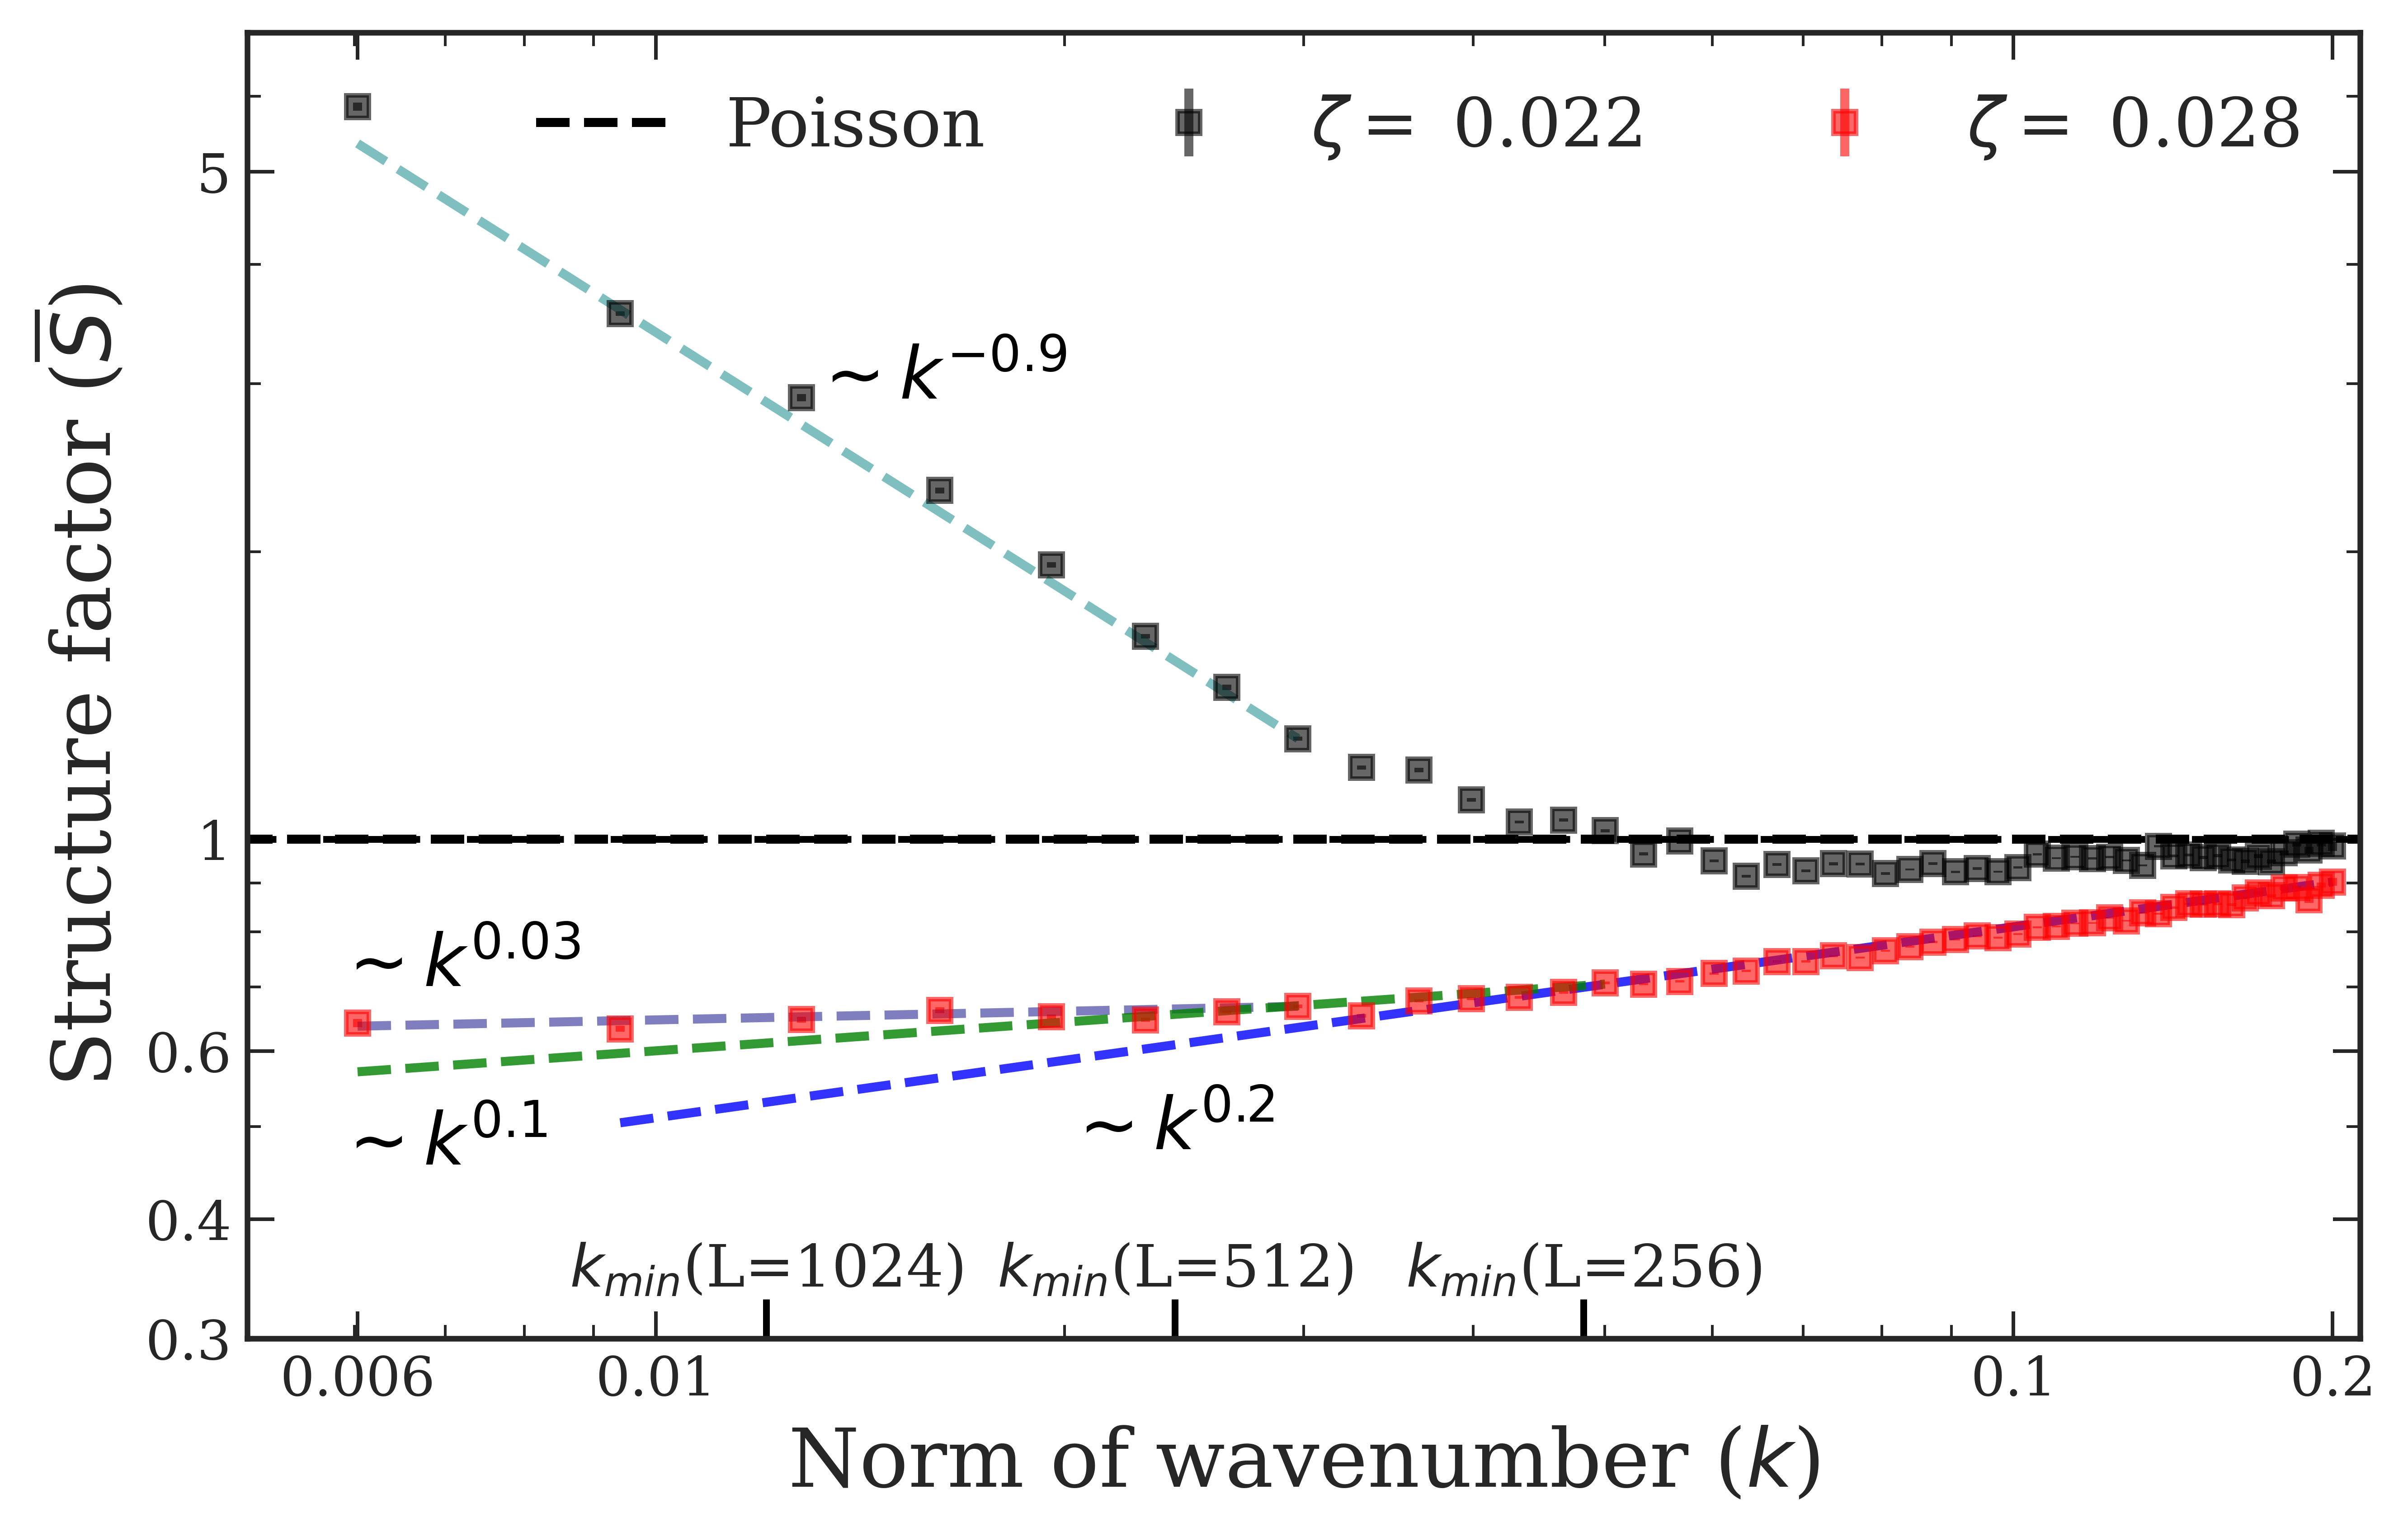

In [13]:
#kmin_list is the smallest k for each L
kmin_list = []
for L in ada.LX:
    kbins = ada.get_sfac(LX=L,time_av=True)[0]
    kmin_list.append(np.min(kbins))


ratio = 4.5 / 7
w = 7.5
h = w * ratio
fig, ax = plt.subplots(ncols=1,figsize=(w, h))
label_list = [r'$k^{-0.9}$', r'$k^{0.03}$']
scaling_exp_list = [float(label.split('{')[-1].split('}')[0]) for label in label_list]
axx = ada.plot_sfac_per_activity(LX = 2048, Npoints_to_fit=8, act_list=[0.022,0.028,], scaling_exp_list = scaling_exp_list, ax = ax)#act_list = [0.022, 0.024, 0.026, 0.027], weighted = True)
kbins, sfac_av = ada.get_sfac(LX=2048)[:2]

ax.set_ylabel(r'Structure factor ($\overline{S}$)')
axx.hlines(1, 0, 0.4, color = 'k', linestyle='--', lw=1.5)
axx.set_ylim([0.3, 7])
axx.set_xlim([0.005,0.18])
axx.legend(loc='upper right', ncol=2)
klabel_list = [r'$k_{min}$(L=256)', r'$k_{min}$(L=512)', r'$k_{min}$(L=1024)']
for i, kmin in enumerate(kmin_list[:-1]):
    axx.vlines(kmin, 0.3, .33, color = 'k', linestyle='-', lw=1.5)
    axx.text(kmin, 0.33, klabel_list[i], fontsize=13, verticalalignment='bottom', horizontalalignment='center')
#axx.text(0.7, 0.2, r'L = 1024', transform=axx.transAxes, fontsize=16, verticalalignment='top', fontweight='normal')
#axx.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

act_idx = ada.act_list[ada.LX.index(2048)].index(0.028)
x = kbins[1:50]
x2 = kbins[0:14]
scaling_exp = .2
scaling_exp2 = .1
axx.plot(x, (sfac_av[-1,act_idx,0]-0.00) * x**scaling_exp / x[-1]**scaling_exp, '--',lw=2, alpha=.8, color='blue')
axx.plot(x2, (sfac_av[len(x2),act_idx,0]+0.0) * x2**scaling_exp2 / x2[-1]**scaling_exp2, '--',lw=2, alpha=.8, color='green')
axx.legend(ncol=3)
fig.dpi = 720

ax.text(0.013, 3.3, r'$\sim k^{-0.9}$', fontsize=16, verticalalignment='top', fontweight='normal', color='k')
ax.text(0.0058, 0.8, r'$\sim k^{0.03}$', fontsize=16, verticalalignment='top', fontweight='normal', color='k')
ax.text(0.0058, 0.52, r'$\sim k^{0.1}$', fontsize=16, verticalalignment='top', fontweight='normal', color='k')
ax.text(0.02, 0.54, r'$\sim k^{0.2}$', fontsize=16, verticalalignment='top', fontweight='normal', color='k')